<a href="https://colab.research.google.com/github/ezemontero7/flask_0/blob/main/tp_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio: Zonas de peligro





##En este notebook colab desarrollaremos el trabajo correspondiente a Clustering de la materia Elementos de Aprendizaje de Maquina y Big Data.

El objetivo es implementar algun metodo de clustering que nos permita clasificar entre zonas de baja o alta peligrosidad segun un conjunto de datos entrre los que se encuentran Asesinatos, Poblacion Urbana, Asaltos, etc.

Importamos las librerias que vamos a utilizar para desarrollar el trabajo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Lectura del dataframe que contiene los datos que analizaremos.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Big data - Machine Learning 2023/Crimenes.csv')

In [ ]:
data

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8




---



A continuacion, procecderemos a quitar de nuestros datos la columna 'Estado', ya que en los procesamientos que siguen a continuacion, no se aceptan datos tipo 'String'.

In [ ]:
data_n = data.drop('Estado', axis=1)

In [ ]:
data_n

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


El modelo que hemos elegido para hacer la clasificacion por clustering es el K-means.
Para realizar este modelo, el primer paso siempre es elegir
en cuantas agrupaciones queremos segmentar los datos.
Lo que se utiliza para tener un panorama y poder elegir de una manera mas correcta la cantidad de agrupaciones se le denomina El metodo del codo, que lo que muestra es la inercia de los clusters, y se debe elegir el cluster en el que se observa que la inercia respecto al numero de clusters siguiente no es muy pronunciada.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

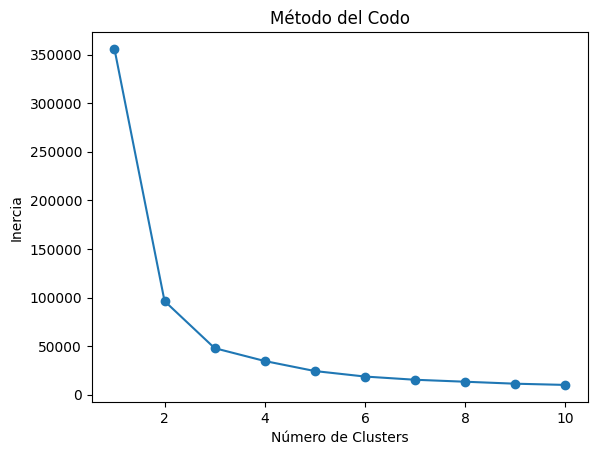

In [ ]:
#Implementacion del metodo del codo.
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_n)
    inertia.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

En el grafico del codo podemos observar que el numero optimo de cluster podria ser el 2 o el 3, tal vez mas el 3 porque es donde comienza a disminuir muy significativamente la inercia, pero ante la duda de un posible sobreajuste y tambien al haber hecho ciertas pruebas, decidimos quedarnos con el numero 2 de clusters, ya que ademas en donde se reduce muchisimo la inercia respecto de su anterior cluster.

In [ ]:
# Aplicamos KMeans con n_clusters=2
kmeans = KMeans(n_clusters=2)


Ahora, aplicamos el clustering con n clusters=2 y lo asignamos en el dataframe en una nueva columna llamada Cluster, que se aplica a la fila que corresponda segun el agrupamiento que haya hecho.

In [ ]:
data['Cluster'] = kmeans.fit_predict(data_n)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


Este grafico tambien lo realizamos con 3 clusters y nos mostraba los grupos muy mezclados, por eso fue uno de los motivos que decidimos utilizar el n clusters =2

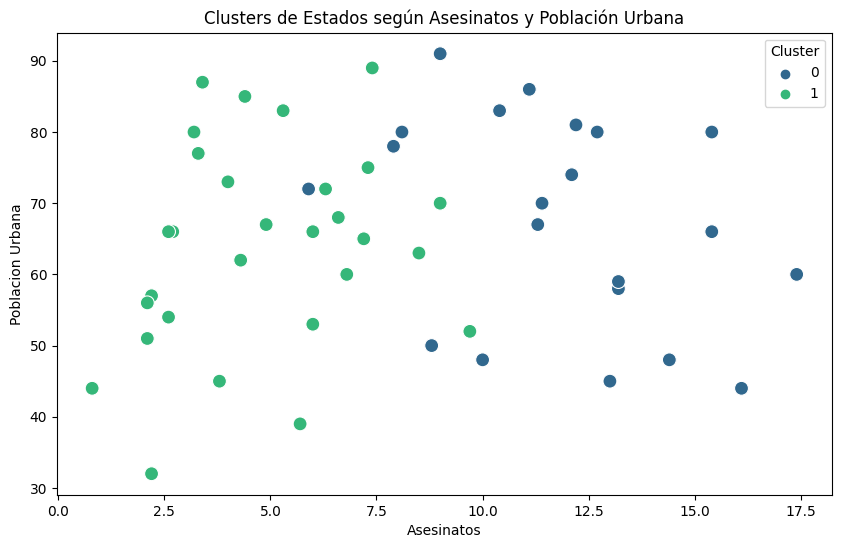

In [ ]:
# Visualizamos los clusters en función de dos características (por ejemplo, Asesinatos y Población Urbana)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Asesinatos', y='Poblacion Urbana', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Clusters de Estados según Asesinatos y Población Urbana')
plt.show()

Adicionalmente, hicimos una muestra estadistica que indique el promedio de los datos de cada Cluster, donde podemos ver que para el cluster 0, el promedio de Asesinatos, Asaltos y Violaciones es mucho mas alto que el del cluster 1, teniendo los dos grupos un promedio de poblacion similares.

In [ ]:
cluster_stats = data.groupby('Cluster').mean()
print(cluster_stats)

         Asesinatos     Asaltos  Poblacion Urbana  Violaciones
Cluster                                                       
0         11.857143  255.000000         67.619048    28.114286
1          4.841379  109.758621         64.034483    16.248276


<ipython-input-101-4db60c7f19c3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats = data.groupby('Cluster').mean()


Por ultimo, creamos una funcion que agregue una columna mas al dataframe que equivalga con su respectivo grupo, es decir, que indique si es, segun el agrupamiento que realizo el modelo, si es una zona de baja o alta peligrosidad.

In [ ]:

cluster_alta_peligrosidad = 0  # Segun el analisis de los datos, el cluster que se asigno como clusterr 0 es el que mayor promedio de asesinatos, asaltos y violaciones tiene.

# Creamos la funcion para asignar categorias segun corresponda
def asignar_categorias(row):
    cluster = row['Cluster']
    # Evaluar el número de cluster y asignar categoría
    if cluster == cluster_alta_peligrosidad:
        return 'Alta Peligrosidad'
    else:
        return 'Baja Peligrosidad'

# Aplicamos la función para asignar categorías a cada fila del DataFrame
data['Categoria'] = data.apply(asignar_categorias, axis=1)

Aqui entonces podemos observar en el dataframe el agrupamiento de cada estado en Baja o Alta peligrosidad segun sus datos y habiendo aplicado el clustering con K-means.

In [ ]:
data

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Categoria
0,Alabama,13.2,236,58,21.2,0,Alta Peligrosidad
1,Alaska,10.0,263,48,44.5,0,Alta Peligrosidad
2,Arizona,8.1,294,80,31.0,0,Alta Peligrosidad
3,Arkansas,8.8,190,50,19.5,0,Alta Peligrosidad
4,California,9.0,276,91,40.6,0,Alta Peligrosidad
5,Colorado,7.9,204,78,38.7,0,Alta Peligrosidad
6,Connecticut,3.3,110,77,11.1,1,Baja Peligrosidad
7,Delaware,5.9,238,72,15.8,0,Alta Peligrosidad
8,Florida,15.4,335,80,31.9,0,Alta Peligrosidad
9,Georgia,17.4,211,60,25.8,0,Alta Peligrosidad
